# Software Pricing DC2

# Outline
This report analyze the results of an A/B test conducted to decide if sell a software at higher price could be a good decision or not. Data was collected for a period of thre months assigning the base price (39 dollars) to the control sample and an increased price of 50% (59 dollars) to the test sample. 

# Key findings
- As expected, increasing the software price, decrease the conversion rate of the 22%. But at the same time the revenue per user increase of 18% with the increased price. So, it is important to find a balance between those two opposite factors.

- Considering the test group, the analysis shows that the fraction of conversions coming from Google ads increased while those coming from Facebook ads decreased. Other sources behave in a comparable way for the two samples. It seems that mobile user convert a bit more than web users. And finally, about the operative system, it seems that IoS customers have an higher conversion rate than other OS.

- About the test efficiency, it seems that the A/B test have been runned too long. It could be achieved a significant (>99.7%) difference in observed conversion rates in about 1/3 of the test total duration.

 Coding and explanation can be found in each dedicated section, organized as follow:
 * [Explorative Data Analysis ](#Explorative-Data-Analysis )
 * [Impact of increased software price ](#Impact-of-increased-software-price )
     * [Conversion rate ](#Conversion-rate  )
     * [Overall and revenue per user ](#Overall-and-revenue-per-user  )
 * [Data visualizations for customers insights ](#Data-visualizations-for-customers-insights )
 * [Testing efficiency ](#Testing-efficiency )

In [2]:
#Import lybraries
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

# Explorative Data Analysis

In [3]:
#import data
data_test_results=pd.read_csv('test_results.csv')
data_test_results.head(3)

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted
0,0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0
1,1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0
2,2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0


In [70]:
data_test_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        316800 non-null  int64  
 1   user_id           316800 non-null  int64  
 2   timestamp         316466 non-null  object 
 3   source            316488 non-null  object 
 4   device            316800 non-null  object 
 5   operative_system  296461 non-null  object 
 6   test              316800 non-null  int64  
 7   price             316800 non-null  float64
 8   converted         316800 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 21.8+ MB


In [43]:
data_user_table = pd.read_csv('user_table.csv')
data_user_table.head(3)

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39


In [92]:
# Check user variables values
#data_user_table['city'].value_counts().plot(kind='bar')
len(data_user_table['country'].unique())
#sns.catplot(y="country", kind="count", data=data_user_table)

1

In [52]:
data_user_table['city'].unique()

array(['Peabody', 'Reno', 'Rialto', 'Carson City', 'Chicago', 'New York',
       'Durham', 'Burke', 'Oklahoma City', 'Charlotte', 'Chesapeake',
       'Brentwood', 'Seattle', 'Oakland', 'Stratford', 'Topeka',
       'Fort Lauderdale', 'Newport News', 'Kansas City', 'Amarillo',
       'Lawton', 'Houston', 'Casas Adobes', 'Bridgeport', 'Birmingham',
       'Memphis', 'Quincy', 'Los Angeles', 'Federal Way',
       'Rancho Cucamonga', 'Fontana', 'Cuyahoga Falls', 'Gilbert',
       'Redford', 'Shreveport', 'Indianapolis', 'Austin', 'Hesperia',
       'Meriden', 'Toms River', 'Chicopee', 'Spring Hill', 'Dearborn',
       'Jacksonville', 'Avondale', 'La Habra', 'Toledo', 'Temple',
       'Colton', 'San Antonio', 'Eau Claire', 'Union City',
       'Redondo Beach', 'Mesa', 'Overland Park', 'Revere', 'Wellington',
       'Citrus Heights', 'Fort Smith', 'Yonkers', 'Cary', 'Fullerton',
       'Woonsocket', 'Southfield', 'Nashville', 'North Fort Myers',
       'Metairie', 'Florissant', 'Germantown'

In [53]:
len(data_user_table['city'].unique())

923

I do not join the two dataframes because it seems there are no usefull info into the second dataframe. In fact we have just 1 country and 923 cities, so we cannot segment by contry or city.

# Impact of increased software price

## Conversion rate

In [25]:
# Count the number of conversion for the control and test (converted =1), test=higher_price=1
converted = data_test_results.groupby('test')['converted'].apply(lambda x: x[x == 1].count())
converted

test
0    4035
1    1773
Name: converted, dtype: int64

In [26]:
# to check
non_converted = data_test_results.groupby('test')['converted'].apply(lambda x: x[x == 0].count())
non_converted

test
0    198692
1    112300
Name: converted, dtype: int64

In [8]:
sample_size = data_test_results.groupby('test')['converted'].count()
sample_size

test
0    202727
1    114073
Name: converted, dtype: int64

In [10]:
conversion_rate = converted/sample_size
conversion_rate

test
0    0.019904
1    0.015543
Name: converted, dtype: float64

In [128]:
# Write results
print('conversion rate (control): ', conversion_rate[0])
print('conversion rate (test): ', conversion_rate[1])

conversion rate (control):  0.019903614220108817
conversion rate (test):  0.015542678810936857


So, it seems that the difference is small, but we need to calculate how significant is the difference.

We can use those calculated conversion rates to calculate the p-value associated with our null hypothesis and quantify how likely is the observed difference in conversion rates due to random chance.

## Statistical consideration
So my null hypothesis is that the two conversion rate are not really different. 

In [12]:
# variance 
variance = (conversion_rate*(1-conversion_rate))/sample_size
variance

test
0    9.622527e-08
1    1.341343e-07
Name: converted, dtype: float64

In [153]:
# Test Statistic T-test (T student)
def TestStat():
    deltaF = conversion_rate[1] - conversion_rate[0]
    sigma = np.sqrt(variance[1] + variance[0])
    TS = deltaF/sigma
    return TS

In [154]:
ttest=TestStat()
ttest

-9.086078997686402

In [155]:
pval = 1.0 - stats.norm.cdf(abs(ttest))
print('the p-value is', pval)

the p-value is 0.0


So the the difference is significant! Because TS is bigger than 2 sigma. We observe a difference of about 9 sigma. It seems that users into the control sample convert more frequently than the ones into test sample, that means that the increasing of the price is lowering the probability that the customer will buy the software.

# Overall and revenue per user
It is important to take a look at total revenue for the two samples and mainly at the revenue per user for the two prices.

In [60]:
control_data=data_test_results[(data_test_results['test'] == 0)]
test_data=data_test_results[(data_test_results['test'] == 1)]

In [137]:
# Revenue per user
revenue_per_user_control = conversion_rate[0]*control_data['price']
revenue_per_user_control[0]

0.7762409545842438

In [135]:
revenue_per_user_test = conversion_rate[1]*test_data['price']
revenue_per_user_test[3]

0.9170180498452746

We need to check again if the observed differece 0.92 and 0.78 is significant or not. We could apply the same statistic test.

In [139]:
# variance for the revenue per user distribution
variance_control = (revenue_per_user_control*(1-revenue_per_user_control))/sample_size[0]
variance_control[0]

8.567725809112045e-07

In [141]:
# variance for the revenue per user distribution
variance_test = (revenue_per_user_test*(1-revenue_per_user_test))/sample_size[1]
variance_test[3]

6.670811331624845e-07

In [158]:
# Test Statistic T-test (T student)
def TestStat_revenue():
    deltaF = revenue_per_user_test[3] - revenue_per_user_control[0]
    sigma = np.sqrt(variance_control[0] + variance_test[3])
    TS = deltaF/sigma
    return TS

In [160]:
ttest_revenue=TestStat_revenue()
ttest_revenue

114.04082776064493

In [161]:
pval_revenue = 1.0 - stats.norm.cdf(abs(ttest))
print('the p-value is', pval)

the p-value is 0.0


Again it seems that the observed difference is really significant! So we could reject our null hypothesis that the observed difference of the two means is due to a chance.

In [63]:
# Total revenue per control
total_rev_control=sample_size[0]*39
total_rev_control

7906353

In [64]:
# Total revenue per test
total_rev_test=sample_size[1]*59
total_rev_test

6730307

The total revenue for the two sample is 7.9M for the control and 6.7M for the test.
To conclude it seems that an higer price lower the conversion rate, but the revenue per customer increase thanks to the higher price. The best option is to find a sort of equilibrium point between those opposite effects.

#### Caveat:  unbanced samples
The two samples are unbalanced! 33% and 66% this impact all the distributions and also the Power analysis. 

# Data visualizations for customers insights
To find some way to improve our conversion rate we need to look at the subgroup of customers who converted in both samples. In order to see if there is any difference in behavior related to the other dempgraphic variables we have: the source, the device and the operative system.

In [35]:
# Look at converted into both samples
converted_both_sample = data_test_results[(data_test_results['converted'] == 1)]

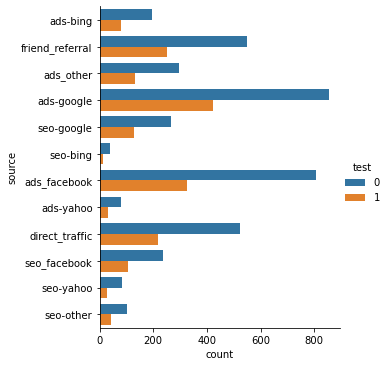

In [37]:
# by source
sns.catplot(y="source", hue="test", kind="count", data=converted_both_sample)

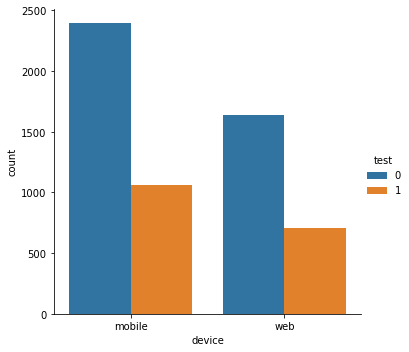

In [40]:
# by device
sns.catplot(x="device", hue="test", kind="count", data=converted_both_sample)

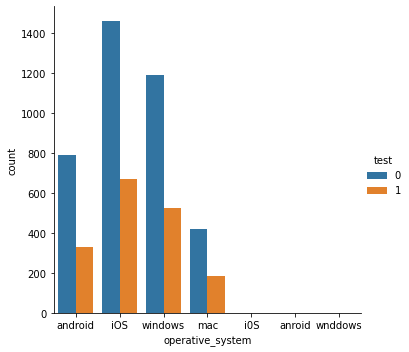

In [41]:
# by operative system
sns.catplot(x="operative_system", hue="test", kind="count", data=converted_both_sample)

In [56]:
# Check if there are multiple entries for the same user
entries_per_user=data_test_results.groupby(['user_id']).count()
len(entries_per_user)

316800

len(data_test_results)

Ok, 1 entry per user!!!

The differences in counts could be related to the different sizes of the two samples. So, to check the real behaviour, we need to "equalize" the sample size.

## Look at the plots for two samples equal sized
I am going to slice converted users for control and test, to check the distributions and normalize the sample size.

In [79]:
data_test_converted = data_test_results[(data_test_results['converted'] == 1) & (data_test_results['test'] == 1)]
data_control_converted = data_test_results[(data_test_results['converted'] == 1) & (data_test_results['test'] == 0)]

In [80]:
len(data_test_converted_sized)

1773

In [81]:
len(data_control_converted_sized)

4035

In [82]:
# Now slices a common sample
data_test_converted_sized=data_test_converted.iloc[:1500,:] 
data_control_converted_sized=data_control_converted.iloc[:1500,:] 

In [83]:
len(data_test_converted_sized)

1500

In [84]:
# Now append the two dfs togheter and remake the plots
data_converted_total = data_test_converted_sized.append(data_control_converted_sized, ignore_index=True)

In [85]:
len(data_converted_total)

3000

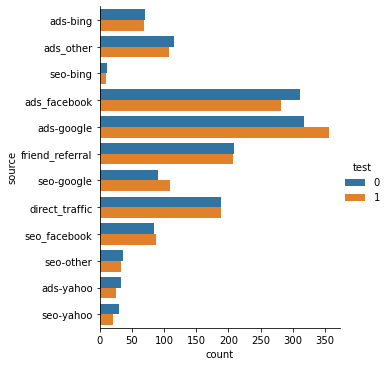

In [89]:
# Remake the plots
# by source
sns.catplot(y="source", hue="test", kind="count", data=data_converted_total);

Now the distributions of control and test appear much better and more comparable. From this plot we can say that it seems that the conversion rate is higher for customers coming from ads-google, than facebook and respect to the other sources. And it seems that customers into the test sample convert a little bit more than customers into the control, at least for source = ads-google. 

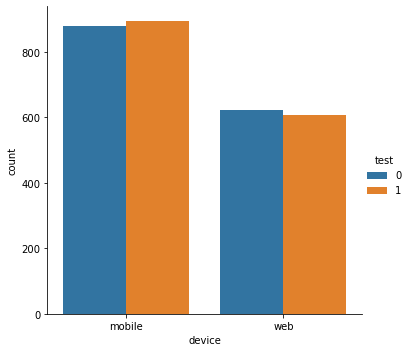

In [90]:
# by device
sns.catplot(x="device", hue="test", kind="count", data=data_converted_total);

Here, control and test customers behave absolutely the same! It seems that the conversion rate is higher for customers that use the mobile instead of web.

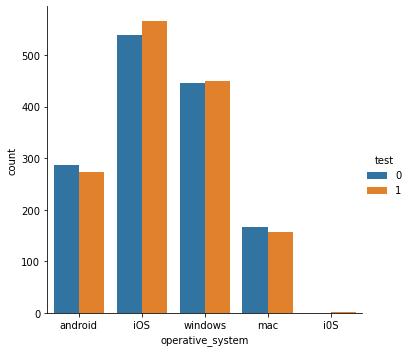

In [91]:
# by operative system
sns.catplot(x="operative_system", hue="test", kind="count", data=data_converted_total);

Same consideration than before. Test and control are completely comparable, it seems that customers that use IoS convert a little bit more frequent than customers that use windows or android or mac. And a little bit more into the test sample than the control.Hard to explain why!

# Testing efficiency

## Experiment duration
It seems that there are a couple of problem with dates into the dataset. Some strange format with minute=60 and an year wrongly inputed 2815. So, we need to clean those cases.

In [96]:
# Look for this specific value
data_test_results.loc[data_test_results['timestamp'] == '2015-04-24 12:60:46']

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted
54,54,370914,2015-04-24 12:60:46,direct_traffic,mobile,android,0,39.0,0
77104,77104,493696,2015-04-24 12:60:46,direct_traffic,mobile,android,0,39.0,0
98348,98348,450970,2015-04-24 12:60:46,direct_traffic,mobile,android,0,39.0,0
182288,182288,283342,2015-04-24 12:60:46,direct_traffic,mobile,android,0,39.0,0
192065,192065,472694,2015-04-24 12:60:46,direct_traffic,mobile,android,0,39.0,0


It seems there are lot of raws that show this problem. So I can fix it changing 60 with 59

In [119]:
data_test_results['timestamp'] = data_test_results['timestamp'].str.replace('60', '59')

It seems there is an outlier due to a wrong year input: 2815 instead of 2015. So we need to correct this... 

In [121]:
# Fix wrong year
data_test_results['timestamp'] = data_test_results['timestamp'].str.replace('2815', '2015')

In [122]:
data_test_results['timestamp'] = data_test_results['timestamp'].astype('datetime64')

In [123]:
data_test_results['timestamp'].head(3)

0   2015-05-08 03:38:34
1   2015-05-10 21:08:46
2   2015-04-04 15:01:23
Name: timestamp, dtype: datetime64[ns]

In [124]:
# Calculate the experiment duration
start_exp = data_test_results['timestamp'].min()
end_exp = data_test_results['timestamp'].max()
duration = end_exp - start_exp
start_exp, end_exp, duration

(Timestamp('2015-03-02 00:04:12'),
 Timestamp('2015-05-31 23:59:45'),
 Timedelta('90 days 23:55:33'))

So it seems that the experiment have been running for 90 days, since March to May 2015. The achived difference is about 9 sigma for the two conversion rate.
Thus, it is worth seeing how much shorter we could have run the test and still generated the same insights. If the testing period could be made shorter, then insights could be generated more rapidly and important business decisions made earlier.

The way we can see how much shorter we could have made the test is by setting a target significance, then reducing the sample size until that target significance is reached. If we adopt a 3-sigma threshold (>99.7% confidence), we should have been stopped the test after 30 days, instead of 90.